### [Boosting, Stacking, and Bagging for Ensemble Models](https://medium.com/@kylejones_47003/boosting-stacking-and-bagging-for-ensemble-models-for-time-series-analysis-with-python-d74ab9026782)

> Building better time series forecasts by combining multiple models

Ensemble models combine the predictions of multiple base models to improve overall performance. By leveraging the strengths of diverse models, ensemble methods often outperform single models in terms of accuracy, robustness, and generalization. For time series analysis, ensemble techniques can help tackle challenges like autocorrelation, non-stationarity, and complex temporal patterns.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install -q numpy pandas matplotlib
!pip install -q xgboost scikit-learn

#### Bagging (Bootstrap Aggregating)

Bagging combines predictions from multiple models trained on different bootstrap samples of the data. It reduces variance by averaging or voting across predictions. Random forests are a popular bagging-based algorithm. We will use lag features as inputs for time series forecasting.

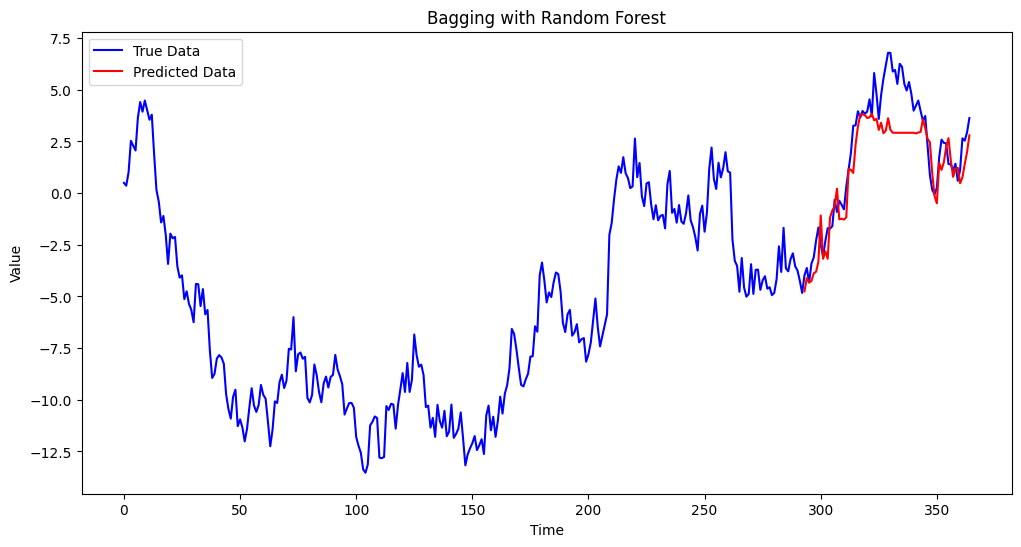

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Simulate time series data
np.random.seed(42)
data = np.cumsum(np.random.randn(365))  # Cumulative sum to mimic trend

# Create lag features
lag = 5
X = np.array([data[i:i+lag] for i in range(len(data) - lag)])
y = data[lag:]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(data, label="True Data", color='blue')

# Calculate the correct index for predictions
test_data_index = range(len(data)-len(y_test), len(data))
plt.plot(test_data_index, y_pred, label="Predicted Data", color='red')

plt.title("Bagging with Random Forest")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
# plt.savefig("bagging_random_forest.png")
plt.show()

#### Boosting

Boosting sequentially builds an ensemble by training each new model to correct the errors of its predecessor. It’s particularly effective for reducing bias and improving accuracy. XGBoost is a gradient boosting framework that performs well on structured data, including time series.

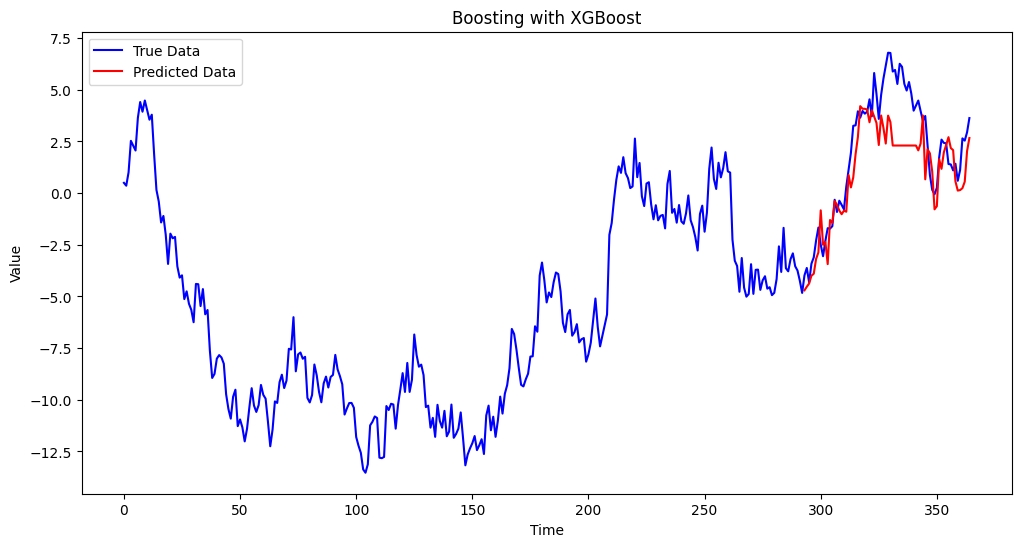

In [4]:
from xgboost import XGBRegressor

# Train XGBoost model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(data, label="True Data", color='blue')

# Calculate the correct index for predictions
test_data_index = range(len(data)-len(y_test), len(data))
plt.plot(test_data_index, y_pred_xgb, label="Predicted Data", color='red')

plt.title("Boosting with XGBoost")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
## plt.savefig("boosting_xgboost.png")
plt.show()

#### Stacking

Stacking combines predictions from multiple base models (e.g., Random Forest, GradientBoostingRegressor) using a meta-model, which learns to optimally weight these predictions. It’s a more flexible ensemble method compared to bagging and boosting. I swapped out XGBoost for GradientBoostingRegressor because it works better in the Sci-Kit learn pipeline.

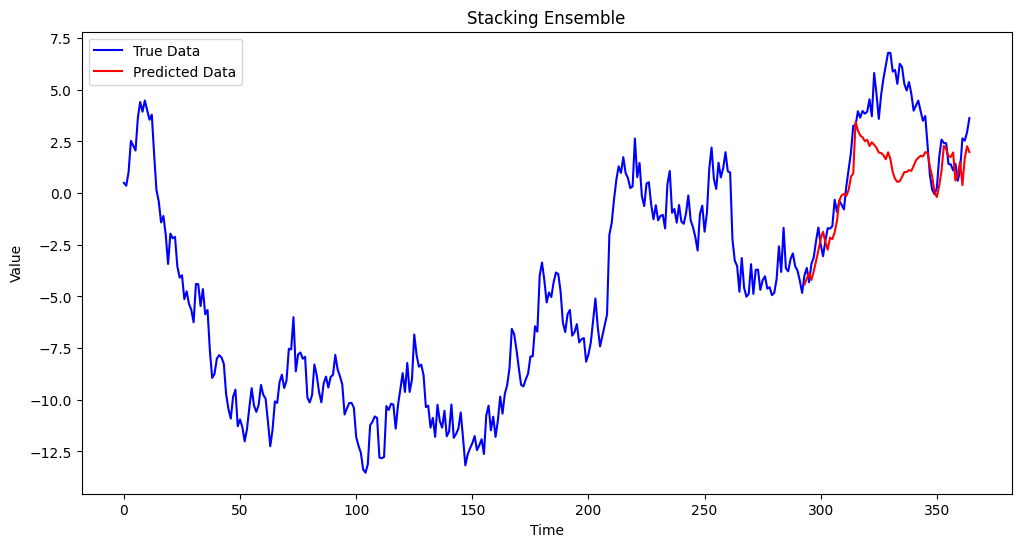

In [5]:
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

# Define base models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42)),
    ('gbr', GradientBoostingRegressor(n_estimators=50, random_state=42)),
    ('svr', SVR(kernel='rbf'))
]

# Meta-model
meta_model = Ridge()

# Stacking Regressor
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5
)

# Fit the model
stacking_model.fit(X_train, y_train)

# Predictions
y_pred_stack = stacking_model.predict(X_test)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(data, label="True Data", color='blue')

# Calculate the correct index for predictions
test_data_index = range(len(data)-len(y_test), len(data))
plt.plot(test_data_index, y_pred_stack, label="Predicted Data", color='red')

plt.title("Stacking Ensemble")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
## plt.savefig("stacking_ensemble.png")
plt.show()

Bagging, boosting, and stacking can help improve time series forecasting. The goal is to get the benefits from each model to help reduce variance, correct bias, and capture complex patterns. Bagging helps reducing overfitting, boosting helps refining predictions, and stacking offers the flexibility to combine the best of multiple algorithms.